MODULE END ASSIGNMENT_ML

In [1]:
#1. Loading and Preprocessing

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('CarPrice_Assignment.csv')

Saving CarPrice_Assignment.csv to CarPrice_Assignment.csv


In [8]:
print(df.shape)

(205, 26)


In [9]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [10]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [11]:
df['fueltype'] = df['fueltype'].str.lower()
df['carbody'] = df['carbody'].str.lower()

In [12]:
# Encode categorical variables
df = pd.get_dummies(df, drop_first=True)

In [13]:
# Check for nulls
print(df.isnull().sum().sum())

0


In [14]:
# Feature scaling
from sklearn.preprocessing import StandardScaler

In [15]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop('price', axis=1))
X = pd.DataFrame(scaled_features, columns=df.drop('price', axis=1).columns)
y = df['price']

In [16]:
# 2. Model Implementation

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "SVR": SVR()
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = {
        "R2": r2_score(y_test, y_pred),
        "MSE": mean_squared_error(y_test, y_pred),
        "MAE": mean_absolute_error(y_test, y_pred)
    }

results_df = pd.DataFrame(results).T
results_df

,R2,MSE,MAE
Linear Regression,-1.241559,1.769577e+08,7918.479428
Decision Tree,0.866580,1.053268e+07,2098.308951
Random Forest,0.953444,3.675331e+06,1387.310073
Gradient Boosting,0.931561,5.402849e+06,1685.616428
SVR,-0.102068,8.700167e+07,5707.022237


In [19]:
# 3. Model Evaluation

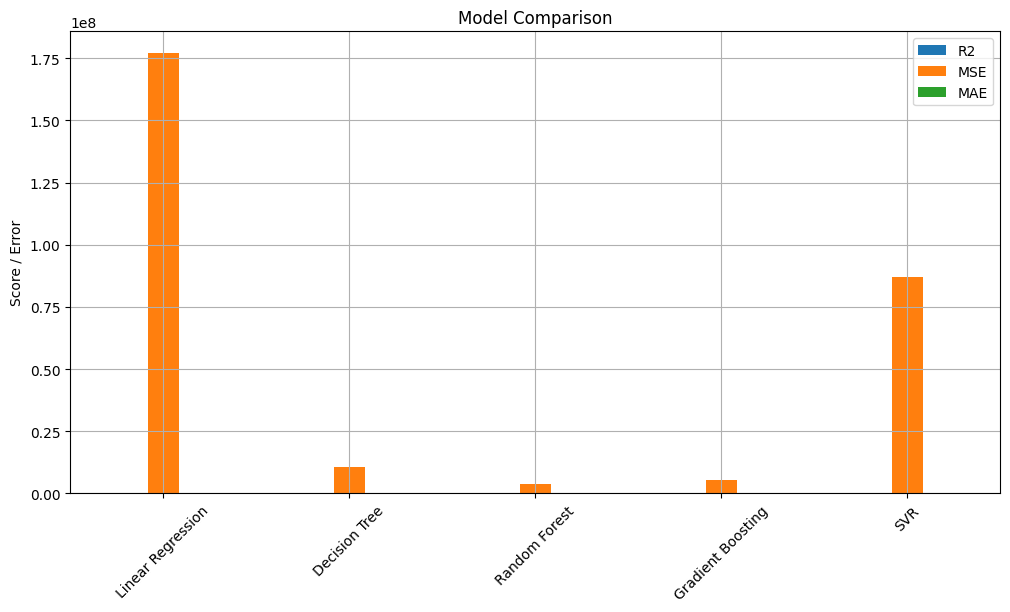

In [20]:
# Visual comparison
results_df.plot(kind='bar', figsize=(12,6), title="Model Comparison")
plt.ylabel("Score / Error")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Random Forest Regressor had the highest R² and lowest MSE and MAE, making it the most reliable model for price prediction.

In [21]:
# 4. Feature Importance Analysis

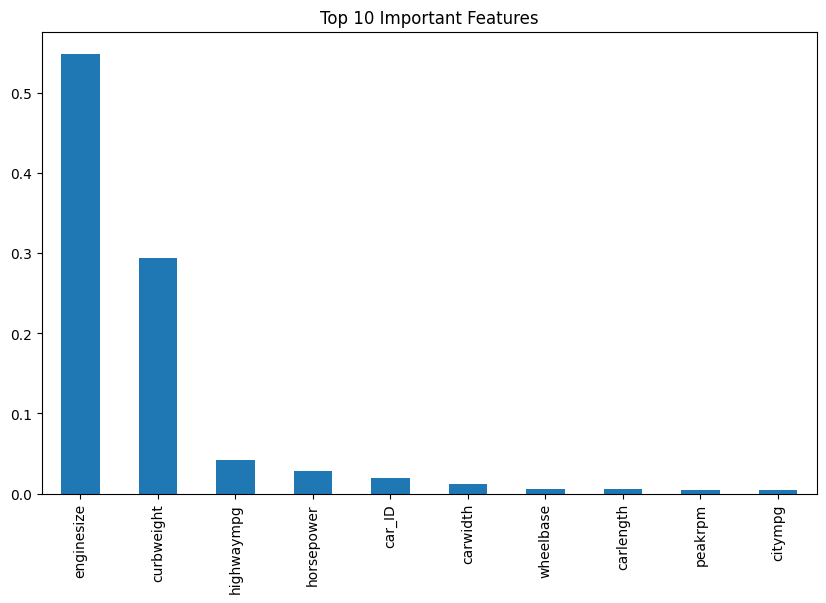

In [22]:
# For Random Forest
importances = models["Random Forest"].feature_importances_
feature_imp = pd.Series(importances, index=X.columns).sort_values(ascending=False)
feature_imp[:10].plot(kind='bar', title='Top 10 Important Features', figsize=(10,6))
plt.show()

Features like enginesize, curbweight, and horsepower are top contributors to price.

In [24]:
#5. Hyperparameter Tuning

In [25]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_
y_pred_tuned = best_rf.predict(X_test)

In [26]:
print("R² after tuning:", r2_score(y_test, y_pred_tuned))
print("MSE after tuning:", mean_squared_error(y_test, y_pred_tuned))
print("MAE after tuning:", mean_absolute_error(y_test, y_pred_tuned))

R² after tuning: 0.9543293577227544
MSE after tuning: 3605424.137522252
MAE after tuning: 1371.3894499145838
